<a href="https://colab.research.google.com/github/joyinning/chatbot-info-extraction/blob/main/Information_Extraction_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information Extraction Chatbot

## **Project Overview**
This project aims to develop a sophisticated chatbot capable of extracting key information from text and summarizing it in a concise format. The project encompasses the training and evaluation of these models, culminating in their deployment through a user-friendly web interface built with Streamlit. The chatbot leverages a combination of powerful natural language processing (NLP) techniques:

- **BERT (Bidirectional Encoder Representations from Transformers)**: Used for Named Entity Recognition (NER) to identify important entities like people, places, organizations, and dates.
- **BiLSTM (Bidirectional Long Short-Term Memory)**: A neural network architecture employed to extract detailed information like Who, Where, When, and What (4W) based on the identified entities.
- **GPT (Generative Pre-trained Transformer)**: A language model used to generate more complex information, such as Why and How (1W1H), providing deeper insights into the extracted information.


## Phase 1: Data Preparation and Preprocessing
**Objective**: Prepare and process input data for model training and evaluation.<br>
**Description**: Raw data is collected and processed to make it suitable for training and evaluating the models. It involves tasks such as tokenization, tagging, and splitting the data into training and test sets. Preprocessing steps ensure the data is in the right format and quality for effective model training.
- **Tokenization**: Splitting setences into individual tokens (words).
- **Tagging**: Assigning NER tags to each token.
- **Data Splitting**: Dividing the dataset into training and test sets for model training and evaluation.

Install necessary libraries and mounts Google Drive for data and model storage

In [ ]:
# !pip install accelerate -U
# !pip install datasets seqeval tiktoken openai --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 4.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Understand the dataset <br>
1. Shape: **47,959 (sentences)** / 4 columns (features)
2. Columns: Sentence #, Sentnece, POS, Tag(NER)
  - Sentence #: A unique identifier for each sentence.
  - **Sentence: The actual text content of the sentence.**
  - POS: Part-of-speech tags for each word in the sentence.
  - **Tag: Entity tags for each word. (NER Tags)**
3. Missing Values: None

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv("/content/TalkFile_ner_2.csv.csv")\

print(f"df.shape: {df.shape}")
print(f"df.info(): {df.info()}")
print(f"df.isnull().sum(): {df.isnull().sum()}")
df.head()

df.shape: (47959, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47959 entries, 0 to 47958
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence #  47959 non-null  object
 1   Sentence    47959 non-null  object
 2   POS         47959 non-null  object
 3   Tag         47959 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB
df.info(): None
df.isnull().sum(): Sentence #    0
Sentence      0
POS           0
Tag           0
dtype: int64


,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


Basic statistics about sentence lengths <br>
- Short sentences might not contribute meaningfully to the analysis or modeling tasks.


In [ ]:
length_list = df['Sentence'].str.len().tolist()

max_length = max(length_list)
min_length = min(length_list)
avg_length = sum(length_list)/len(length_list)

print(f"Max Length: {max_length}")
print(f"Min Length: {min_length}")
print(f"Average Length: {avg_length:.2f}")

Max Length: 541
Min Length: 3
Average Length: 125.23


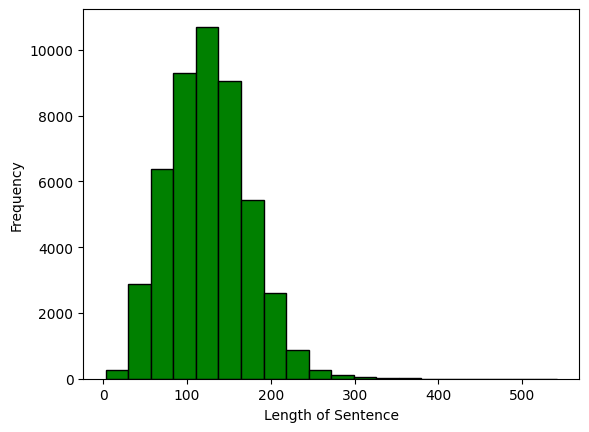

bins: [  3.   29.9  56.8  83.7 110.6 137.5 164.4 191.3 218.2 245.1 272.  298.9
 325.8 352.7 379.6 406.5 433.4 460.3 487.2 514.1 541. ]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.hist(length_list, bins = 20, color='green', edgecolor='black')
plt.xlabel('Length of Sentence')
plt.ylabel('Frequency')
plt.show()

bin_width = (max_length - min_length)/20
bins = np.arange(min_length, max_length + bin_width, bin_width)
print(f"bins: {bins}")

Prepare the dataset for further modeling
1. **Define Label Mapping**: establish a clear mapping between the entities or information types and the corresponding labels models will use.
2. **Filter data and preprocess the dataset**: clean and prepare the data by addressing inconsistencies, errors, and formatting issues and remove sentences which length is less than 4 to filter out short sentences.

NER tags

```
O: Outside - This indicates that the word is not part of a named entity.
B-per: Beginning of a person's name
B-art: Beginning of an artifact (object made by a human)
I-tim: Inside a time indication
I-gpe: Inside a geopolitical entity (country, city, etc.)
B-geo: Beginning of a geographical entity (mountain range, river, etc.)
I-org: Inside an organization
B-gpe: Beginning of a geopolitical entity
I-geo: Inside a geographical entity
I-art: Inside an artifact
B-nat: Beginning of a natural entity (like a plant or animal species)
B-eve: Beginning of an event
I-nat: Inside a natural entity
I-eve: Inside an event
B-org: Beginning of an organization
I-per: Inside a person's name
B-tim: Beginning of a time indication
```



In [ ]:
from itertools import chain

df['Tag'] = df['Tag'].apply(lambda x: x.strip("[]").replace("'", "").split(", ") if isinstance(x, str) else x)

list_all_tag = df.Tag.tolist()
list_labels_ner = ['O'] + [i for i in list(set(chain.from_iterable(list_all_tag))) if i != 'O']

label2id_ner = {tag: ind for ind, tag in enumerate(list_labels_ner)}
id2label_ner = {ind: tag for ind, tag in enumerate(list_labels_ner)}

filtered_data_ner = [(tokens, ner_tags) for tokens, ner_tags in zip(df['Sentence'].apply(lambda x: x.split(' ')), df['Tag'].apply(lambda x: [label2id_ner[i] for i in x])) if len(tokens) >= 4]

text_list_ner, labels_ind_list_ner = zip(*filtered_data_ner)

data_dict_ner = {'id': list(range(len(text_list_ner))), 'tokens': text_list_ner, 'ner_tags': labels_ind_list_ner}
df_ner = pd.DataFrame(data_dict_ner)

print(f"label2ind: {label2id_ner}")
print(f"ind2label: {id2label_ner}")
print("\n")
df_ner

label2ind: {'O': 0, 'I-art': 1, 'B-org': 2, 'B-geo': 3, 'I-per': 4, 'B-eve': 5, 'I-geo': 6, 'B-per': 7, 'I-nat': 8, 'B-art': 9, 'B-tim': 10, 'I-gpe': 11, 'I-tim': 12, 'B-nat': 13, 'B-gpe': 14, 'I-org': 15, 'I-eve': 16}
ind2label: {0: 'O', 1: 'I-art', 2: 'B-org', 3: 'B-geo', 4: 'I-per', 5: 'B-eve', 6: 'I-geo', 7: 'B-per', 8: 'I-nat', 9: 'B-art', 10: 'B-tim', 11: 'I-gpe', 12: 'I-tim', 13: 'B-nat', 14: 'B-gpe', 15: 'I-org', 16: 'I-eve'}




,id,tokens,ner_tags
0,0,"[Thousands, of, demonstrators, have, marched, ...","[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, ..."
1,1,"[Families, of, soldiers, killed, in, the, conf...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,"[They, marched, from, the, Houses, of, Parliam...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 0]"
3,3,"[Police, put, the, number, of, marchers, at, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,4,"[The, protest, comes, on, the, eve, of, the, a...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, ..."
...,...,...,...
47941,47941,"[Indian, border, security, forces, are, accusi...","[14, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0..."
47942,47942,"[Indian, officials, said, no, one, was, injure...","[14, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0..."
47943,47943,"[Two, more, landed, in, fields, belonging, to,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
47944,47944,"[They, say, not, all, of, the, rockets, explod...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


Initialize new tokenizer using AutoTokenizer<br>
Use **AutoTokenizer** for **flexibility** (easily adapt to the new model's toeknizatio nscheme and minimize the changes needed in the code) with the following reasons:
1. **Seamless Integration with Pretrained Models**: AutoTokenizer automatically identifies and loads the correct tokenizer associated with the pretrained model, ensuring compatibility and saving time from manual configuration.
2. **Subword Tokenization**: AutoTokenizer handles the subword tokenization, which handles out-of-vocabulary words and reduce the vocabulary size, allowing the model to recognize and tag even rare or unseen words.
3. **Special Tokens**: It inserts the CLS (for classification) and SEP (to separate segments) automatically inthe correct position.
4. **Alighment with Labels**: As needed to align each token in the input text with its corresponding NER tag, AutoTokenizer ensures that the tokenization during training matches the tokenization during inference.


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Define a new function to takes a dictionary of examples containing 'tokens' (list of words) and 'ner_tags' (corresponding NER labels) and returns a dictionary with tokenized inputs and aligned labels.


In [ ]:
def tokenize_and_align_labels(examples):
    """Tokenizes text and aligns NER labels with the tokenized output.

    Args:
        examples: A dictionary containing the input examples with 'tokens' and 'ner_tags'.

    Returns:
        A dictionary containing the tokenized inputs and aligned labels.
    """
    # Tokenize Input
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    # Iterate over Examples and Labels
    labels = []
    for i, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        # Align Labels with Tokens
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    # Add Labes to Tokenized Inputs
    tokenized_inputs["labels"] = labels

    return tokenized_inputs

Create DatasetDict using the df_ner dataset
1. **DatasetDict**: Convert the dataset in a format for Hugging Face's Transformers library.
2. **DataCollator**: Streamline the process of preparing tokenized data for training the NER model.
    - **Dynamic Padding**: BERT requires input sequences to have the same length. It automatically pads shorter sequences or truncates longer sequence.
    - **Label Alignment**: It maintain the correct alignment between tokens and their corresponding labels, ensuring that padding tokens are assigned a special label (-100) to be ignored during loss calculation.
    - **Attention Mask Creation**: BERT uses attention masks to indicate which tokens are actual input and which are padding and it automatically creates these masks.
    - **Tensor Conversion**: It converts the token IDs, attention masks, and labels into PyTorch tensors.
    - **Batch Creation**: It assembles individual examples into batches, making data loading more efficient during training.

In [ ]:
from datasets import Dataset, DatasetDict
from transformers import DataCollatorForTokenClassification
from sklearn.model_selection import train_test_split

train_df_ner, test_df_ner = train_test_split(df_ner, test_size = 0.2, random_state = 42)

dataset_dict_ner = DatasetDict({
    'train': Dataset.from_pandas(train_df_ner),
    'test': Dataset.from_pandas(test_df_ner)
})

tokenized_dataset_ner = dataset_dict_ner.map(tokenize_and_align_labels, batched=True)
data_collator_ner = DataCollatorForTokenClassification(tokenizer=tokenizer)

Map:   0%|          | 0/38356 [00:00<?, ? examples/s]

Map:   0%|          | 0/9590 [00:00<?, ? examples/s]

## Phase 2: BERT Training
**Objective**: Train a BERT model for Named Entity Recognition (NER). <br>
**Description**: A pre-trained BERT model is fine-tuned on the prepared NER dataset. The model learns to recognize and classify named entities within text, such as person names, organizations, and locations.

Define a function for calculating NER evaluation metrics
1. **Precision**: How accurate the model's positive predictions are (out of all positive predictions).
2. **Recall**: How many of the actual entities the model correctly identifies (out of all actual entities).
3. **F1 Score**: The harmonic mean of precision and recall, providing a single measure of overall performance.
4. **Accuracy**: The proportion of correctly predicted labels to total labels (including non-entity tokens).

In [ ]:
from datasets import load_metric
import seqeval
import numpy as np

seqeval = load_metric("seqeval")

def compute_metrics(p):
    """
    Computes NER evaluation metrics (precision, recall, F1, accuracy) using seqeval.

    Args:
        p (tuple): A tuple containing:
        predictions (numpy.ndarray): Model's predicted labels (shape: [batch_size, seq_length, num_labels]).
        labels (numpy.ndarray): True labels for each token (shape: [batch_size, seq_length]).

    Returns:
        dict: A dictionary containing the overall precision, recall, F1 score, and accuracy.
    """

    # Input Unpacking and Prediction Conversion (one-hot encoded)
    predictions, labels = p
    predictions = np.argmax(predictions, axis = 2)

    # Filter Valid Labels
    true_predictions = [
        [id2label_ner[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [id2label_ner[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    # Metric Calculation
    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

<ipython-input-9-cab546b79e00>:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  seqeval = load_metric("seqeval")


The repository for seqeval contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/seqeval.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Train the BERT model <br>
Fine-tuning the pre-trained BERT model to the specific NER task using the prepared dataset with the training arguments.
1. The model was trained for **3 epochs**.
2. Decreased over each epoch, indicating the model learned from the data. The final **training loss was 0.0895**.
3. Also decreased, showing the model generalized well to unseen data. The final **validation loss was 0.0881**.
4. The final **accuracy** was about **97.30%**.

In [ ]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer
import torch


model_ner_bert = AutoModelForTokenClassification.from_pretrained(
    "bert-base-cased", num_labels=len(label2id_ner), id2label=id2label_ner, label2id=label2id_ner
)

training_args_ner = TrainingArguments(
    output_dir="/content/drive/MyDrive/chatbot_info/models/bert_ner",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ner_bert.to(device)

trainer_ner = Trainer(
    model=model_ner_bert,
    args=training_args_ner,
    train_dataset=tokenized_dataset_ner["train"],
    eval_dataset=tokenized_dataset_ner["test"],
    tokenizer=tokenizer,
    data_collator=data_collator_ner,
    compute_metrics=compute_metrics,
)

trainer_ner.train()

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.103900,0.093696,0.827776,0.826517,0.827146,0.970877
2,0.076000,0.088776,0.827878,0.839807,0.833800,0.972103
3,0.058800,0.088895,0.832642,0.844639,0.838598,0.972845


TrainOutput(global_step=7194, training_loss=0.08889888623438844, metrics={'train_runtime': 1347.3417, 'train_samples_per_second': 85.404, 'train_steps_per_second': 5.339, 'total_flos': 2693332448203128.0, 'train_loss': 0.08889888623438844, 'epoch': 3.0})

Evaluate and save the model
- Test the model with an example sentence which are not in the given dataset.
- It demonstrates a successful transformation of an input sentence into a format suitable for training a named entity recognition model.

In [ ]:
new_sentence = "Elon Musk founded SpaceX in 2002."

tokenized_sentence = tokenizer(new_sentence, return_tensors="pt")
for key, value in tokenized_sentence.items():
  tokenized_sentence[key] = value.to(device)

with torch.no_grad():
  predictions = model_ner_bert(**tokenized_sentence)

predicted_label_ids = torch.argmax(predictions['logits'], dim=2)
predicted_labels = [id2label_ner[label_id.item()] for label_id in predicted_label_ids[0]]

print(tokenized_sentence)
print(predicted_labels)

{'input_ids': tensor([[  101,  2896,  1320, 19569,  5276,  1771,  4525,  3190,  1107,  1617,
           119,   102]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
['O', 'B-per', 'B-per', 'I-per', 'I-per', 'O', 'B-org', 'I-org', 'O', 'B-tim', 'O', 'O']


Save this model for later

In [ ]:
import os

save_dir = "/content/drive/MyDrive/chatbot_info/models/bert_ner"
os.makedirs(save_dir, exist_ok=True)

trainer_ner.save_model(save_dir)

if os.path.exists(save_dir):
  print("Model saved successfully to Google Drive!")
else:
  print("Error: Model not saved.")

Model saved successfully to Google Drive!


## Phase 3: Combine new customized BiLSTM model with BERT embeddings
**Objective**: Integrate a customized BiLSTM model with BERT embeddings for enhanced NER performance. <br>
**Description**: A BiLSTM model is combined with BERT embeddings to improve the accuracy of NER tasks. The BiLSTM model leverages the contextualized word representations from BERT to better capture the sequential information in the text.

Initialize a BiLSTM model with BERT embeddings <br>
Adds a **bidirectional LSTM layer** to capture sequential dependencies and uses **pre-trained BERT embeddings** as input to the BiLSTM model.
1. Model Architecture
    - It is designed for token-level classification tasks for NER.
    - **BERT**: provides contextual embeddings of words.
    - **BiLSTM**: captures sequential dependences between tokens.
2. Process
    - Specifies the pre-trained BERT model, defines the number of classes and control the size and complexity of the layer.
    - Loads the pre-trained model and configurations of the pre-trained model, including hidden size, number of layers, etc, which are used to initialize other components in the model.
    - Freezes the parameters of the BERT embedding layer (will not updated during training) to avoid catastrophic forgetting of pre-trained knowledge.
    - Processes the BERT embeddings using a BiLSTM layer with batch_first, indicating that the input and output tensors of the BiLSTM will have the batch dimension as the first dimension.
    - Applies dropout to the BiLSTM output to prevent overfitting by randomly setting a fraction of neuron activations to zero during training, which helps the model generalize better.
    - Create a classification layer which produces logits (unnormalized scores) for each label, which are then converted into probabilities using a softmax function during inference.
    - As labels are provided, computes the cross-entropy loss between the predicted logits and the true labels with active_loss mask, used to ensure that only the loss for non-padding tokens is considered.
    - In the forward pass, the input text is fed through BERT to get contectual embeddings, embeddings are passed through the BiLSTM to capture sequential dependencies. Then its output is passed through the linear classifier to produce logits and loss is calculated if labels are provided.

In [ ]:
import torch.nn as nn
from transformers import AutoModel, AutoConfig

class BiLSTMForTokenClassification(nn.Module):
    """
        This model combines BERT embeddings with a Bidirectional LSTM (BiLSTM) for token-level classification
        tasks like Named Entity Recognition (NER).

        Args:
            pretrained_model_name_or_path: Name of the pre-trained BERT model to use (e.g., "bert-base-cased").
            num_labels: Number of different labels to predict.
            hidden_size: Dimension of the hidden states in the BiLSTM (default: 128).
            num_lstm_layers: Number of stacked BiLSTM layers (default: 1).
    """
    def __init__(self, model_name, num_labels, hidden_size=128, num_lstm_layers=1):
        super().__init__()
        self.num_labels = num_labels
        self.config = AutoConfig.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)

        # Freeze BERT embeddings
        for name, param in self.bert.named_parameters():
            if name.startswith("embeddings"):
                param.requires_grad = False

        self.bilstm = nn.LSTM(self.bert.config.hidden_size, hidden_size, num_layers=num_lstm_layers, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(hidden_size * 2, num_labels)

    def forward(self, input_ids, attention_mask=None, labels=None):
        if attention_mask is None:
            attention_mask = torch.ones_like(input_ids)

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs[0]
        lstm_output, _ = self.bilstm(sequence_output)
        lstm_output = self.dropout(lstm_output)

        logits = self.classifier(lstm_output)
        loss = None

        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            active_loss = attention_mask.view(-1) == 1
            active_logits = logits.view(-1, self.num_labels)
            active_labels = torch.where(active_loss, labels.view(-1), torch.tensor(loss_fct.ignore_index).type_as(labels))
            valid_mask = (active_labels >= 0) & (active_labels < self.num_labels)
            active_logits = active_logits[valid_mask]
            active_labels = active_labels[valid_mask]
            loss = loss_fct(active_logits, active_labels)

        return {'loss': loss, 'logits': logits}

Instantiate and train the model

In [ ]:
# Define BiLSTMForTokenClassification model
model2_ner = BiLSTMForTokenClassification("bert-base-cased", num_labels=len(id2label_ner))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
training_args2_ner = TrainingArguments(
    output_dir="/content/drive/MyDrive/chatbot_info/models/bilstm_ner",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

model2_ner.to(device)

trainer2_ner = Trainer(
    model=model2_ner,
    args=training_args2_ner,
    train_dataset=tokenized_dataset_ner["train"],
    eval_dataset=tokenized_dataset_ner["test"],
    tokenizer=tokenizer,
    data_collator=data_collator_ner,
    compute_metrics=compute_metrics,
)

trainer2_ner.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.117000,0.104222,0.820815,0.820521,0.820668,0.969925
2,0.086500,0.093856,0.831955,0.837167,0.834553,0.971778
3,0.068500,0.091982,0.831332,0.842491,0.836874,0.972874
4,0.055100,0.093275,0.834113,0.845758,0.839895,0.972946
5,0.047200,0.095318,0.836460,0.843834,0.840131,0.973118


/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=11990, training_loss=0.08712209633134424, metrics={'train_runtime': 2166.9646, 'train_samples_per_second': 88.502, 'train_steps_per_second': 5.533, 'total_flos': 0.0, 'train_loss': 0.08712209633134424, 'epoch': 5.0})

Evaluate the model and save it

In [ ]:
new_sentence = "Elon Musk founded SpaceX in 2002."

tokenized_sentence = tokenizer(new_sentence, return_tensors="pt")

# Remove token_type_ids (not needed for BiLSTM)
tokenized_sentence.pop('token_type_ids')

for key, value in tokenized_sentence.items():
  tokenized_sentence[key] = value.to(device)

with torch.no_grad():
  predictions = model2_ner(**tokenized_sentence)

predicted_label_ids = torch.argmax(predictions['logits'], dim=2)
predicted_labels = [id2label_ner[label_id.item()] for label_id in predicted_label_ids[0]]

print(tokenized_sentence)
print(predicted_labels)

{'input_ids': tensor([[  101,  2896,  1320, 19569,  5276,  1771,  4525,  3190,  1107,  1617,
           119,   102]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
['O', 'B-per', 'B-per', 'I-per', 'I-per', 'O', 'B-org', 'I-org', 'O', 'B-tim', 'O', 'O']


In [ ]:
import os

save_dir = "/content/drive/MyDrive/chatbot_info/models/bilstm_ner"
os.makedirs(save_dir, exist_ok=True)

# Save the model state dictionary
torch.save(model2_ner.state_dict(), os.path.join(save_dir, "model_state_dict.pt"))
torch.save(model2_ner.state_dict(), os.path.join(save_dir, "pytorch_model.bin"))

# Save the model configuration
with open(os.path.join(save_dir, "config.json"), "w") as f:
    f.write(model2_ner.config.to_json_string())

In [ ]:
# Save the tokenizer
tokenizer.save_pretrained("/content/drive/MyDrive/chatbot_info/models/tokenizer")

print("Model saved successfully!")

Model saved successfully!


## Phase 4: 5W1H based Question Answering
**Objective**: Implement a question answering system based on the 5W1H (Who, What, Where, Why, How) framework.<br>
**Description**: This phase involves developing a system that answers questions using the 5W1H framework. The system extracts relevant information from the text based on the specified question type.
- **4W (Who, Where, When, What)**: BERT + BiLSTM for NER + Question/Answering Model
- **1W1H (Why, How)**: GPT 3.5

Load the trained BiLSTM model for NER

In [ ]:
from transformers import BertConfig
import json

def load_custom_model(model_dir, tokenizer_dir, id2label):
    config = AutoConfig.from_pretrained(model_dir, local_files_only=True)

    config.id2label = id2label
    config.num_labels = len(id2label)

    model = BiLSTMForTokenClassification(model_name=config._name_or_path, num_labels=config.num_labels)
    model.config.id2label = id2label
    model.load_state_dict(torch.load(os.path.join(model_dir, 'pytorch_model.bin'), map_location=torch.device('cpu')))
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_dir, local_files_only=True)

    return model, tokenizer

ner_model_dir = "/content/drive/MyDrive/chatbot_info/models/bilstm_ner"
tokenizer_dir = "/content/drive/MyDrive/chatbot_info/models/tokenizer"

ner_model, ner_tokenizer = load_custom_model(ner_model_dir, tokenizer_dir, id2label_ner)

Define QA model using `deepset/bert-base-cased-squad2`
1. **Question Answering Model**: A specialized tool designed to answer questions posed in natural language.
    - It takes a question and a context as input, then identifies the most relevant portion of the context and extracts the answer from it.
2. `deepset/bert-base-cased-squad2`: A specific pre-trained model for question answering.
    - Based on BERT (Bidirectional Encoder REpresentations from Transformers), it has been fine-tuned on the Stanford Question Answering Dataset 2.0 from Wikipedia articles, handling unanswerable questions.

In [ ]:
from transformers import pipeline

qa_model = pipeline('question-answering', model='deepset/bert-base-cased-squad2')

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/bert-base-cased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/152 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Define functions for extracting 4W based information
1. `predict_tags`: Predicts NER tags for a given sentence using the specified model and tokneizer.
2. `extract_5w1h_qa`: Extracts 4W (Who, What, When, Where) information from a sentence using NER tags and a question-answering model.

In [ ]:
def predict_tags(sentence, model, tokenizer, label_map):
    """
    Predicts NER tags for a given sentence using the specified model and tokenizer.

    Args:
        sentence: The input sentence as a string.
        model: The pre-trained model (BiLSTM) for tag prediction.
        tokenizer: The tokenizer used for converting the sentence into tokens.
        label_map: A dictionary mapping numerical label indices to their corresponding tags.

    Returns:
        A list of predicted tags for each token in the sentence.
    """
    tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sentence)))
    inputs = tokenizer.encode(sentence, return_tensors='pt')

    outputs = model(inputs)
    logits = outputs['logits']
    predictions = torch.argmax(logits, dim=2)

    labels = [label_map.get(prediction.item(), "O") for prediction in predictions[0][1:-1]]
    return labels

In [ ]:
def extract_4w_qa(sentence, ner_tags):
    """
    Extracts 4w (Who, What, When, Where) information from a sentence
    using NER tags and a question-answering model.

    Args:
        sentence: The input sentence as a string.
        ner_tags: A list of predicted NER tags for each token in the sentence.

    Returns:
        A dictionary where keys are 5W1H question words and values are the corresponding
        answers extracted from the sentence.
    """
    result = {}
    questions = {
        "B-per": "Who",
        "I-per": "Who",
        "B-geo": "Where",
        "I-geo": "Where",
        "B-org": "What organization",
        "I-org": "What organization",
        "B-tim": "When",
        "I-tim": "When",
        "B-art": "What art",
        "I-art": "What art",
        "B-eve": "What event",
        "I-eve": "What event",
        "B-nat": "What natural phenomenon",
        "I-nat": "What natural phenomenon",
    }

    for ner_tag, entity in zip(ner_tags, sentence.split()):  # Removed pos_tags
        if ner_tag in questions:
            question = f"{questions[ner_tag]} is {entity}?"  # Removed pos_tag
            answer = qa_model(question=question, context=sentence)["answer"]
            result[questions[ner_tag]] = answer

    return result

Test the functions

In [ ]:
sentences = ["John lives in New York.", "Apple is a technology company.", "Elon Musk founded SpaceX in 2002."]
for sentence in sentences:
    ner_tags = predict_tags(sentence, ner_model, ner_tokenizer, id2label_ner)
    result = extract_4w_qa(sentence, ner_tags)
    print(f'Sentence: {sentence}')
    print("Extracted 4W Information:", result)

Sentence: John lives in New York.
Extracted 4W Information: {'Who': 'lives in New York.', 'Where': 'New York'}
Sentence: Apple is a technology company.
Extracted 4W Information: {'What organization': 'technology company'}
Sentence: Elon Musk founded SpaceX in 2002.
Extracted 4W Information: {'Who': 'Elon Musk', 'What organization': 'SpaceX'}


Define functions for extracting Why or How Information
1. Call OpenAI API
2. `count_tokens`: counts the number of tokens in a text string.
3. `generate_why_or_how_question_and_answer`: Generates a "why" or "how" question based on the extracted 4W information and gets the answer using GPT 3.5.
4. `get_why_or_how_answer`: Queries OpenAI's GPT-3.5 model to generate an answer for a given question based on the provided context.

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="")

In [ ]:
import tiktoken

def count_tokens(text):
    """
    Counts the number of tokens in a text string using the tiktoken encoding for GPT-3.5 Turbo.

    Args:
        text: The input text string.

    Returns:
        The number of tokens in the text.
    """
    encoding = tiktoken.encoding_for_model("gpt-3.5-turbo-instruct")
    return len(encoding.encode(text))

In [ ]:
def generate_why_or_how_question_and_answer(extracted_info, sentence):
    """
    Generates a "Why" or "How" question based on the extracted 4W information and gets the answer using GPT-3.5.

    Args:
        extracted_info: A dictionary containing the extracted 4W information.
        sentence: The original sentence.

    Returns:
        A dictionary containing the generated question and its answer, or None if no relevant question can be generated.
    """

    prompt_template = """
    Given the following extracted information and the original sentence, generate a relevant "Why" or "How" question and provide a concise answer based on the given context.

    Extracted Information: {extracted_info}
    Sentence: {sentence}

    Question and Answer:
    """

    prompt = prompt_template.format(extracted_info=extracted_info, sentence=sentence)
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt},
        ],
        max_tokens=150,
        stop=None,
        temperature=0.5,
    )

    question_and_answer = response.choices[0].message.content.strip()

    if question_and_answer:
        try:
            question, answer = question_and_answer.split("\n", 1)
            return {"question": question, "answer": answer}
        except ValueError:
            return None
    else:
        return None

In [ ]:
def get_why_or_how_answer(question, context):
    """
    Queries OpenAI's GPT-3.5 model to generate an answer for a given question based on the provided context.

    Args:
        question (str): The question to be answered.
        context (str): The text context from which the answer should be extracted.

    Returns:
        str: The generated answer from GPT-3.5.
    """
    prompt = f"Question: {question}\nContext: {context}\nAnswer:"

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt},
        ],
        max_tokens=150,
        stop=None,
        temperature=0.5,
    )

    return response.choices[0].text.strip()

**Expected Output** <br>
It will show the extracted 4W Information for each sentence, the generated 'why' or 'how' question (if applicable), the answer to that question, and the token count of the prompt used to generate the answer.
```
Sentence: John lives in New York.
Extracted 4W Information: {'Who': 'John', 'Where': 'New York'}
Generated Question: Why does John live in New York?
Answer: The context does not provide information about why John lives in New York.
Token count: 17
-----
Sentence: Apple is a technology company.
Extracted 4W Information: {'What organization': 'Apple'}
Generated Question: Why is Apple a technology company?
Answer: Apple is a technology company because it designs, develops, and sells consumer electronics, computer software, and online services.
Token count: 20
-----
Sentence: Elon Musk founded SpaceX in 2002.
Extracted 4W Information: {'Who': 'Elon Musk', 'What organization': 'SpaceX', 'When': '2002'}
Generated Question: Why did Elon Musk found SpaceX in 2002?
Answer: Elon Musk founded SpaceX in 2002 to revolutionize space technology and make life multi-planetary.
Token count: 23
-----

```



In [ ]:
sentences = ["John lives in New York.", "Apple is a technology company.", "Elon Musk founded SpaceX in 2002."]
for sentence in sentences:
    ner_tags = predict_tags(sentence, ner_model, ner_tokenizer, id2label_ner)
    extracted_info = extract_4w_qa(sentence, ner_tags)
    print(f'Sentence: {sentence}')
    print("Extracted 4W Information:", extracted_info)

    result = generate_why_or_how_question_and_answer(extracted_info, sentence)
    if result:
        question = result["question"]
        answer = result["answer"]
        prompt = f"Question: {question}\nContext: {sentence}\nAnswer:"
        token_count = count_tokens(prompt)
        print("Generated Question:", question)
        print("Answer:", answer)
        print(f"Token count: {token_count}")
    print("-----")

Sentence: John lives in New York.
Extracted 4W Information: {'Who': 'lives in New York.', 'Where': 'New York'}
Generated Question: Why does John live in New York?
Answer: Answer: John lives in New York because it is his place of residence.
Token count: 20
-----
Sentence: Apple is a technology company.
Extracted 4W Information: {'What organization': 'technology company'}
Generated Question: Question: Why is Apple considered a technology company?
Answer: 
Answer: Apple is considered a technology company because it specializes in developing and selling consumer electronics, software, and online services, positioning itself as a leader in the tech industry.
Token count: 22
-----
Sentence: Elon Musk founded SpaceX in 2002.
Extracted 4W Information: {'Who': 'Elon Musk', 'What organization': 'SpaceX'}
Generated Question: Question: Why did Elon Musk found SpaceX in 2002?
Answer: 
Answer: Elon Musk founded SpaceX in 2002 with the goal of reducing space transportation costs and enabling the colo

## Phase 5: Deployment to Streamlit
**Objective**: Deploy the information extraction chatbot as a user-friendly web application. <br>
**Description**: Prepare and deploy the chatbot application to Streamlit Cloud (or another suitable platform), making it accessible via a web interface for users to interact with.

Example File Structure <br>


```
app.py
model_utils.py
requirements.txt
models/
    ├── bert_model.pkl   
    ├── bilstm-model.pkl
    ├── config.json   
    └── tokenizer/   
        ├── special_tokens_map.json
        ├── tokenizer_config.json
        └── tokenizer.json
        └── vocab.txt

```



1. `app.py`: The main script that defines the Gradio interface, handles user input, and interacts with functions in model_utils.py to perform information extraction and question answering.
2. `model_utils.py`: Contains utility functions for loading models, performing Named Entity Recognition (NER), extracting 4W (Who, What, When, Where) information, generating questions, and getting answers from GPT-3.5.
3. `requirements.txt`: Lists the Python packages required to run the application (e.g., torch, transformers, gradio, openai, tiktoken).
4. `models/`: A folder that stores the trained model files.
    - `bert_model.pkl`: The BERT model file.
    - `bilstm-model.pkl`: The BiLSTM model file.
    - `config.json`: The model configuration file.
    - `tokenizer/:` A folder containing tokenizer-related files.
        - `special_tokens_map.json`: Contains information about special tokens.
        - `tokenizer_config.json`: The tokenizer configuration file.
        - `tokenizer.json`: Contains tokenizer information.
        - `vocab.txt`: The vocabulary file.


**app.py** <br>
1. **Load Models**: Initializes the chatbot by calling the load_models function from `model_utils.py`. This loads the pre-trained BERT and BiLSTM models, the tokenizer (for text processing), and the `id2label_ner` dictionary (mapping numerical labels to NER tags) into memory.
2. **Create Gradio Interface**:
    - Sets up the user interface using the Gradio library.
    - Creates a `gr.Interface` object, defining:
        - The main function (`extract_and_display_info`) that will handle the information extraction and question answering process.
        - An input component (`inputs="text"`): A text box where the user enters their text.
        - An output component (`outputs="text"`): A text area to display the extracted information and generated questions/answers.
        - A title (`title="Information Extraction Chatbot"`): The title of the Gradio app displayed at the top.
3. **Information Extraction and Question Answering**:

- When the user clicks the "Extract Information" button in the Gradio interface:
    - **Input Validation**: Checks if the user has entered any text. If not, it displays a message asking the user to input text.
    - **4W Information Extraction**: Uses the BiLSTM model and tokenizer to perform - Named Entity Recognition (NER) on the input text, identifying entities like people, places, organizations, and times. Then, the `extract_4w_qa` function extracts relevant information related to who, what, when, and where from the text and NER tags.
    - **Why/How Question Generation and Answering**: Based on the extracted 4W information, the `generate_why_or_how_question_and_answer` function uses GPT-3.5 to generate relevant "why" or "how" questions and their corresponding answers. These questions and answers are added to the extracted information.
    - **Output Display**: The extracted information, along with any generated questions and answers, is formatted and displayed in the output text area of the Gradio interface.



In [ ]:
import gradio as gr
from model_utils import load_models, extract_information, predict_tags, extract_4w_qa, generate_why_or_how_question_and_answer

bert_model, bilstm_model, ner_tokenizer, id2label_ner = load_models()

def extract_and_display_info(user_input):
    if user_input:
        ner_tags = predict_tags(user_input, bilstm_model, ner_tokenizer, id2label_ner)
        extracted_info = extract_4w_qa(user_input, ner_tags)
        qa_result = generate_why_or_how_question_and_answer(extracted_info, user_input)

        if qa_result:
            extracted_info["Generated Question"] = qa_result["question"]
            extracted_info["Answer"] = qa_result["answer"]

        output_text = "Extracted Information:\n"
        for question, answer in extracted_info.items():
            output_text += f"- **{question}:** {answer}\n"
        return output_text
    else:
        return "Please enter some text."

iface = gr.Interface(
    fn=extract_and_display_info,
    inputs="text",
    outputs="text",
    title="Information Extraction Chatbot"
)
iface.launch()

**model_utils.py**
1. Model Loading Functions: loads the following models and corresponding required files:
    - a pre-trained BERT
    - a custom-trained BiLSTM
    - the configuration of a custom model
    - the label map
    - the model's state dictionary (weights)
    - the tokenizer
    - *Initializes a `BiLSTMForTokenClassification` model*
2. Information Extraction Functions: extract and print information using the following functions:
    - `extract_information()`
    - `predict_tags()`
    - `extract_4w_qa()`
    - `generate_why_or_how_question_and_answer()`

In [ ]:
import gradio as gr
from model_utils import load_models, extract_information, predict_tags, extract_4w_qa, generate_why_or_how_question_and_answer

bert_model, bilstm_model, ner_tokenizer, id2label_ner = load_models()

def extract_and_display_info(user_input):
    if user_input:
        ner_tags = predict_tags(user_input, bilstm_model, ner_tokenizer, id2label_ner)
        extracted_info = extract_4w_qa(user_input, ner_tags)
        qa_result = generate_why_or_how_question_and_answer(extracted_info, user_input)

        if qa_result:
            extracted_info["Generated Question"] = qa_result["question"]
            extracted_info["Answer"] = qa_result["answer"]

        output_text = "Extracted Information:\n"
        for question, answer in extracted_info.items():
            output_text += f"- **{question}:** {answer}\n"
        return output_text
    else:
        return "Please enter some text."

iface = gr.Interface(
    fn=extract_and_display_info,
    inputs="text",
    outputs="text",
    title="Information Extraction Chatbot"
)
iface.launch()

**requirements.txt** <br>
Lists the Python libraries that need to be installed for the information extraction chatbot to run.

In [ ]:
torch
transformers
openai
tiktoken
gradio